In [1]:
import os
os.getcwd()

'/Users/Akash/Documents/Bootcamp/UAPHX201905DATA4-master/05-Matplotlib/Homework/Pyber'

In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride, city, on='city')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

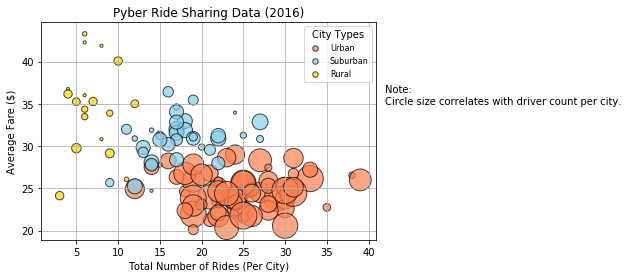

In [50]:
# Obtain the x and y coordinates for each of the three city types
city_df = (df.groupby('city', as_index=False)
       .agg({'ride_id':pd.Series.nunique, 'fare':'mean'})
       .rename(columns={'ride_id':'num_rides', 'fare':'avg_fare'}))

city_df = city_df.merge(df[['city', 'driver_count', 'type']], on='city').drop_duplicates().reset_index()

urban_x = city_df[city_df['type'] == 'Urban']['num_rides']
urban_y = city_df[city_df['type'] == 'Urban']['avg_fare']
urban_z = city_df[city_df['type'] == 'Urban']['driver_count']

suburban_x = city_df[city_df['type'] == 'Suburban']['num_rides']
suburban_y = city_df[city_df['type'] == 'Suburban']['avg_fare']
suburban_z = city_df[city_df['type'] == 'Suburban']['driver_count']

rural_x = city_df[city_df['type'] == 'Rural']['num_rides']
rural_y = city_df[city_df['type'] == 'Rural']['avg_fare']
rural_z = city_df[city_df['type'] == 'Rural']['driver_count']

# Build the scatter plots for each city types
plt.scatter(x=urban_x, y=urban_y, s=urban_z*10, alpha=0.7, c="coral", edgecolor="black", label="Urban")
plt.scatter(x=suburban_x, y=suburban_y, s=suburban_z*10, alpha=0.7, c="skyblue", edgecolor="black", label="Suburban")
plt.scatter(x=rural_x, y=rural_y, s=rural_z*10, alpha=0.7, c="gold", edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc='best', title="City Types", fontsize=8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png")


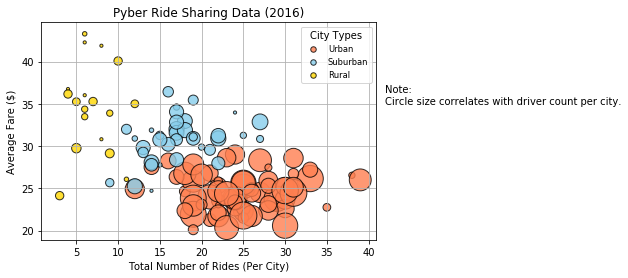

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

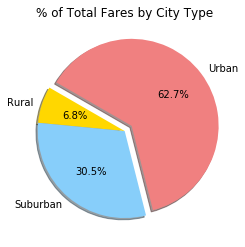

In [64]:
# Calculate Type Percents
fares_by_city = df.groupby('type')['fare'].sum()
fares_by_city_percent = 100*fares_by_city / sum(fares_by_city)

# Build Pie Chart
plt.pie(fares_by_city_percent, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0,0,0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

plt.show()

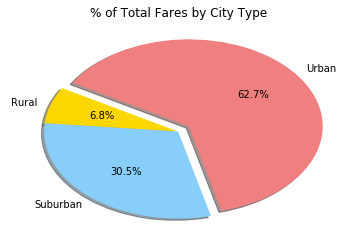

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

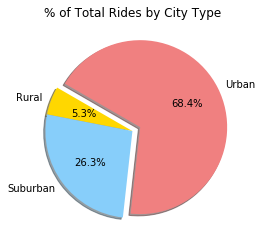

In [66]:
# Calculate Ride Percents
rides_by_city = df.groupby('type')['ride_id'].nunique()
rides_by_city_percent = 100*rides_by_city / sum(rides_by_city)

# Build Pie Chart
plt.pie(rides_by_city_percent, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0,0,0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("% of Total Rides by City Type.png")

plt.show()

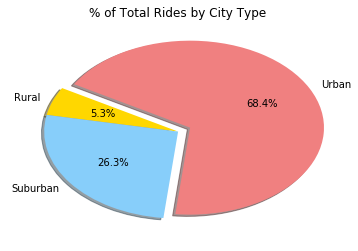

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

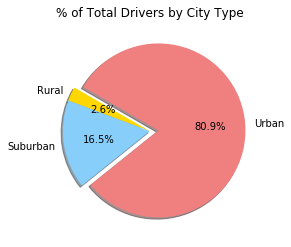

In [70]:
# Calculate Driver Percents
drivers_by_city = df.drop_duplicates(subset=['city', 'driver_count']).groupby('type')['driver_count'].sum()
drivers_by_city_percent = 100*drivers_by_city / sum(drivers_by_city)

# Build Pie Chart
plt.pie(drivers_by_city_percent, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0,0,0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")

plt.show()

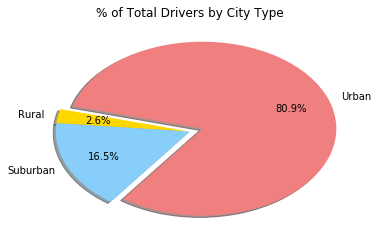

In [6]:
# Show Figure
plt.show()